In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
#find the data per day by adding up all the counties 
#graph the daily data points
#find max/min in county and country wide, can alos find it by dates
# compare lockdown dates and holidays


In [73]:
# import the csv
census_df=pd.read_csv("ca_data_jul20-jul21.csv")

In [74]:
len(census_df)

21141

In [75]:
census_df.nunique()

date        365
county       58
state         1
cases     12560
deaths     2314
dtype: int64

In [76]:
#seperate the date into year month
#pd.to_datetime(census_df['date'].astype(str), format='ym-d')
census_data= pd.to_datetime(census_df['date'])

year=census_data.dt.year
month_date= census_data.dt.month
day= census_data.dt.day


In [77]:
census_df['year']=year
census_df['month']=month_date
census_df


,date,county,state,cases,deaths,year,month
0,2020-07-01,Alameda,California,6177,136.0,2020,7
1,2020-07-01,Alpine,California,1,0.0,2020,7
2,2020-07-01,Amador,California,22,0.0,2020,7
3,2020-07-01,Butte,California,189,2.0,2020,7
4,2020-07-01,Calaveras,California,40,0.0,2020,7
...,...,...,...,...,...,...,...
21136,2021-06-30,Trinity,California,342,3.0,2021,6
21137,2021-06-30,Tulare,California,49896,852.0,2021,6
21138,2021-06-30,Tuolumne,California,4242,71.0,2021,6
21139,2021-06-30,Ventura,California,81884,1032.0,2021,6


In [78]:
census_df["month"]=census_df["month"].map("{:02d}".format)

In [79]:
census_df.loc[census_df["date"]=='2021-06-04']

,date,county,state,cases,deaths,year,month
19576,2021-06-04,Alameda,California,89112,1264.0,2021,06
19577,2021-06-04,Alpine,California,89,0.0,2021,06
19578,2021-06-04,Amador,California,3687,47.0,2021,06
19579,2021-06-04,Butte,California,12478,193.0,2021,06
19580,2021-06-04,Calaveras,California,2186,56.0,2021,06
19581,2021-06-04,Colusa,California,2265,18.0,2021,06
19582,2021-06-04,Contra Costa,California,69827,816.0,2021,06
19583,2021-06-04,Del Norte,California,1439,8.0,2021,06
19584,2021-06-04,El Dorado,California,10304,113.0,2021,06
19585,2021-06-04,Fresno,California,102566,1709.0,2021,06


In [80]:
census_df['period']= census_df['year'].astype(str).str.cat(census_df['month'].astype(str))
#df['Age'].astype(str).str.cat(df['Name'], sep=' ')
#{:02d}'.format(d.month)
#Out[5]: '03'
#school_df["Total Budget"]=school_df["Total Budget"].map("${:,.2f}".format)
census_df

,date,county,state,cases,deaths,year,month,period
0,2020-07-01,Alameda,California,6177,136.0,2020,07,202007
1,2020-07-01,Alpine,California,1,0.0,2020,07,202007
2,2020-07-01,Amador,California,22,0.0,2020,07,202007
3,2020-07-01,Butte,California,189,2.0,2020,07,202007
4,2020-07-01,Calaveras,California,40,0.0,2020,07,202007
...,...,...,...,...,...,...,...,...
21136,2021-06-30,Trinity,California,342,3.0,2021,06,202106
21137,2021-06-30,Tulare,California,49896,852.0,2021,06,202106
21138,2021-06-30,Tuolumne,California,4242,71.0,2021,06,202106
21139,2021-06-30,Ventura,California,81884,1032.0,2021,06,202106


In [81]:
grouped_month=census_df.groupby("period")
grouped_month.sum()


,cases,deaths,year
period,,,
202007,11404982,232621.0,3575400
202008,19168704,349458.0,3631960
202009,23157862,438311.0,3514800
202010,27164081,522654.0,3631960
202011,31809852,551791.0,3514800
202012,53961030,683920.0,3631960
202101,90326882,1029821.0,3633758
202102,97356780,1317354.0,3282104
202103,112432256,1747316.0,3633758


In [82]:
grouped_data=census_df.groupby(["county","period"])
grouped_data

In [83]:
census_df

,date,county,state,cases,deaths,year,month,period
0,2020-07-01,Alameda,California,6177,136.0,2020,07,202007
1,2020-07-01,Alpine,California,1,0.0,2020,07,202007
2,2020-07-01,Amador,California,22,0.0,2020,07,202007
3,2020-07-01,Butte,California,189,2.0,2020,07,202007
4,2020-07-01,Calaveras,California,40,0.0,2020,07,202007
...,...,...,...,...,...,...,...,...
21136,2021-06-30,Trinity,California,342,3.0,2021,06,202106
21137,2021-06-30,Tulare,California,49896,852.0,2021,06,202106
21138,2021-06-30,Tuolumne,California,4242,71.0,2021,06,202106
21139,2021-06-30,Ventura,California,81884,1032.0,2021,06,202106


In [84]:
months=["July","August","September","October","November","December","January","Febuary","March","April","May","June"]

In [85]:
grouped_month["month name"]=months
grouped_month

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [86]:
subtitle_month_string="from July 2020 to June 2021"
deaths_month=grouped_month["deaths"].astype(int)
month_name=grouped_month["month name"]


AttributeError: 'SeriesGroupBy' object has no attribute 'astype'

In [87]:
plt.plot(month_name, cases, color="orange", label="Cases")
plt.suptitle("California Covid Cases",y=1.05, fontsize=18)
plt.title(subtitle_month_string, fontsize=10)
plt.xlabel("Months")
plt.xticks(months, months, rotation=60)
plt.ylabel("Number of cases (in millions)")

NameError: name 'month_name' is not defined

In [88]:
# group the data by dates 
grouped_dates=census_df.groupby("date")
daily_data=grouped_dates.sum()
daily_data

,cases,deaths,year
date,,,
2020-07-01,239764,6168.0,115140
2020-07-02,248198,6263.0,115140
2020-07-03,256298,6315.0,115140
2020-07-04,265176,6329.0,115140
2020-07-05,271587,6369.0,115140
...,...,...,...
2021-06-26,3815178,63555.0,117218
2021-06-27,3816045,63586.0,117218
2021-06-28,3817655,63597.0,117218


In [89]:
# find the sum of cases and deaths by using sum
date_data=grouped_dates.sum()
date_data

,cases,deaths,year
date,,,
2020-07-01,239764,6168.0,115140
2020-07-02,248198,6263.0,115140
2020-07-03,256298,6315.0,115140
2020-07-04,265176,6329.0,115140
2020-07-05,271587,6369.0,115140
...,...,...,...
2021-06-26,3815178,63555.0,117218
2021-06-27,3816045,63586.0,117218
2021-06-28,3817655,63597.0,117218


In [90]:
dates=daily_data.index
cases=daily_data['cases']
deaths=daily_data['deaths']


In [91]:
dates

Index(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
       '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
       ...
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
       '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30'],
      dtype='object', name='date', length=365)

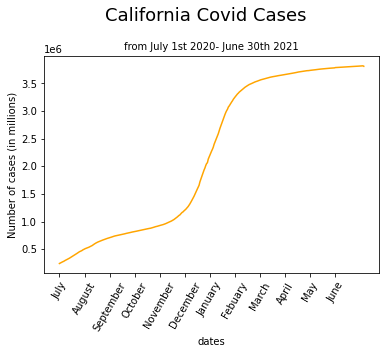

In [113]:
subtitle_string=("from July 1st 2020- June 30th 2021")

plt.plot(dates, cases, color="orange")
plt.suptitle("California Covid Cases",y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=10)
plt.xticks(np.arange(360, step=30),months,rotation=60)
plt.xlabel("dates")
plt.ylabel("Number of cases (in millions)")
plt.savefig("images/california_covid_cases.png")
plt.savefig("")

Text(11.125, 0.5, 'Deaths')

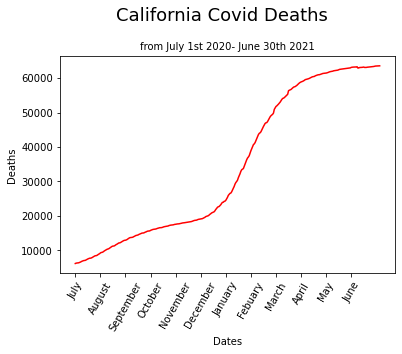

In [124]:
subtitle_string=("from July 1st 2020- June 30th 2021")

plt.plot(dates, deaths, color="red")
plt.suptitle("California Covid Deaths",y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=10)
plt.xticks(np.arange(360, step=30),months,rotation=60)
plt.savefig("images/california_covid_deaths.png")
plt.xlabel("Dates")
plt.ylabel("Deaths")

In [94]:
death_jump=daily_data['deaths'].diff()

In [95]:
#create grouped by county

In [96]:
invert_daily_data=daily_data.sort_index(ascending=False)
case_jump=daily_data['cases'].diff()
case_jump

date
2020-07-01       NaN
2020-07-02    8434.0
2020-07-03    8100.0
2020-07-04    8878.0
2020-07-05    6411.0
               ...  
2021-06-26     785.0
2021-06-27     867.0
2021-06-28    1610.0
2021-06-29     656.0
2021-06-30   -8145.0
Name: cases, Length: 365, dtype: float64

In [97]:
new_daily_cases=pd.DataFrame({"new daily cases": case_jump})
new_daily_cases=new_daily_cases.loc[new_daily_cases["new daily cases"]!=-8145]
new_cases=new_daily_cases["new daily cases"]
new_dates=new_daily_cases.index
new_months=[" ","July","August","September","October","November","December","January","Febuary","March","April","May","June"," "]

In [98]:
daily_data["new daily cases"]=case_jump
daily_data["daily deaths"]=death_jump

In [99]:
daily_data["dates"]=dates
daily_data

,cases,deaths,year,new daily cases,daily deaths,dates
date,,,,,,
2020-07-01,239764,6168.0,115140,NaN,NaN,2020-07-01
2020-07-02,248198,6263.0,115140,8434.0,95.0,2020-07-02
2020-07-03,256298,6315.0,115140,8100.0,52.0,2020-07-03
2020-07-04,265176,6329.0,115140,8878.0,14.0,2020-07-04
2020-07-05,271587,6369.0,115140,6411.0,40.0,2020-07-05
...,...,...,...,...,...,...
2021-06-26,3815178,63555.0,117218,785.0,12.0,2021-06-26
2021-06-27,3816045,63586.0,117218,867.0,31.0,2021-06-27
2021-06-28,3817655,63597.0,117218,1610.0,11.0,2021-06-28


In [114]:
daily_data["daily deaths"].max()

1084.0

In [115]:
daily_data.loc[daily_data["new daily cases"]==64986.0]

,cases,deaths,year,new daily cases,daily deaths,dates
date,,,,,,
2020-12-26,2129749,24221.0,117160,64986.0,257.0,2020-12-26


In [116]:
daily_data["daily deaths"].max()

1084.0

In [117]:
daily_data.loc[daily_data["daily deaths"]==1084.0]

,cases,deaths,year,new daily cases,daily deaths,dates
date,,,,,,
2021-02-24,3549145,50953.0,117218,5852.0,1084.0,2021-02-24


In [118]:
daily_data.loc[daily_data["dates"]]

,cases,deaths,year,new daily cases,daily deaths,dates
date,,,,,,
2020-07-01,239764,6168.0,115140,NaN,NaN,2020-07-01
2020-07-02,248198,6263.0,115140,8434.0,95.0,2020-07-02
2020-07-03,256298,6315.0,115140,8100.0,52.0,2020-07-03
2020-07-04,265176,6329.0,115140,8878.0,14.0,2020-07-04
2020-07-05,271587,6369.0,115140,6411.0,40.0,2020-07-05
...,...,...,...,...,...,...
2021-06-26,3815178,63555.0,117218,785.0,12.0,2021-06-26
2021-06-27,3816045,63586.0,117218,867.0,31.0,2021-06-27
2021-06-28,3817655,63597.0,117218,1610.0,11.0,2021-06-28


In [119]:
daily_data.iloc[150:200]

,cases,deaths,year,new daily cases,daily deaths,dates
date,,,,,,
2020-11-28,1206296,19132.0,117160,13207.0,32.0,2020-11-28
2020-11-29,1219511,19151.0,117160,13215.0,19.0,2020-11-29
2020-11-30,1237238,19209.0,117160,17727.0,58.0,2020-11-30
2020-12-01,1253905,19327.0,117160,16667.0,118.0,2020-12-01
2020-12-02,1272079,19440.0,117160,18174.0,113.0,2020-12-02
2020-12-03,1293937,19586.0,117160,21858.0,146.0,2020-12-03
2020-12-04,1318188,19791.0,117160,24251.0,205.0,2020-12-04
2020-12-05,1343193,19876.0,117160,25005.0,85.0,2020-12-05
2020-12-06,1371985,19937.0,117160,28792.0,61.0,2020-12-06


In [120]:
len(census_df.loc[census_df["date"]=="2020-12-25"])

58

In [121]:
census_df.loc[census_df["date"]=="2020-12-"]

,date,county,state,cases,deaths,year,month,period


Text(11.125, 0.5, 'New Cases')

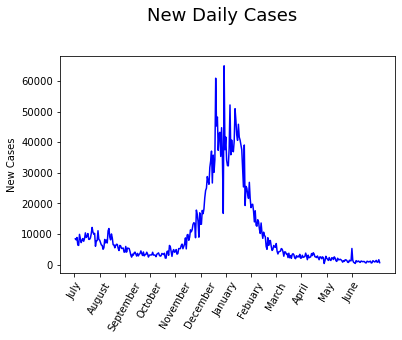

In [122]:


plt.plot(new_dates, new_cases, color="blue")
plt.suptitle("New Daily Cases",y=1.05, fontsize=18)
plt.xticks(np.arange(360, step=30),months,rotation=60)
plt.savefig("images/new_daily_cases.png")
plt.ylabel("New Cases")

In [103]:
holiday_data=daily_data.iloc[123:215]

In [104]:
len(holiday_data)
holiday_dates=holiday_data["dates"]
holiday_cases=holiday_data["cases"]
holiday_new_cases=holiday_data["new daily cases"]

In [105]:
holiday_daily_deaths=holiday_data["daily deaths"]

In [106]:
holiday_data

,cases,deaths,year,new daily cases,daily deaths,dates
date,,,,,,
2020-11-01,938897,17671.0,117160,3635.0,10.0,2020-11-01
2020-11-02,944148,17700.0,117160,5251.0,29.0,2020-11-02
2020-11-03,949390,17751.0,117160,5242.0,51.0,2020-11-03
2020-11-04,954629,17818.0,117160,5239.0,67.0,2020-11-04
2020-11-05,960905,17866.0,117160,6276.0,48.0,2020-11-05
...,...,...,...,...,...,...
2021-01-27,3253201,38927.0,117218,18630.0,705.0,2021-01-27
2021-01-28,3272829,39527.0,117218,19628.0,600.0,2021-01-28
2021-01-29,3292572,40192.0,117218,19743.0,665.0,2021-01-29


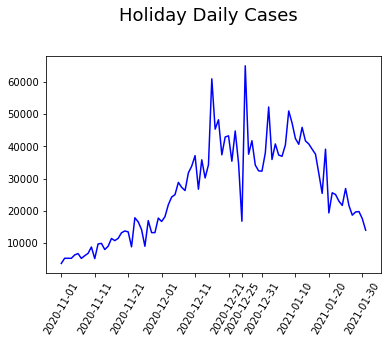

In [111]:
plt.plot(holiday_dates, holiday_new_cases, color="blue")
plt.suptitle("Holiday Daily Cases",y=1.05, fontsize=18)
plt.xticks([0,10,20,30,40,50,54,60,70,80,90],rotation=60)
plt.savefig("images/holiday_daily_cases.png")
plt.show()

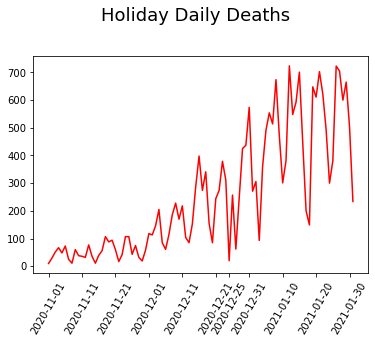

In [110]:


plt.plot(holiday_dates, holiday_daily_deaths, color="red")
plt.suptitle("Holiday Daily Deaths",y=1.05, fontsize=18)
plt.xticks([0,10,20,30,40,50,54,60,70,80,90],rotation=60)
plt.savefig("images/holiday_daily_deaths.png")


plt.show()